In [1]:
from __future__ import division
import distance
import os
import ast
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import distance
import networkx as nx

%matplotlib inline

#### Extracting sequences

In [9]:
trnas = {}

for aa in os.listdir('../data/'):
    trnas[aa[:-4]] = pd.DataFrame.from_csv('../data/' + aa, sep = '\t')

#### Plotting graphs

In [19]:
def build_graph(aa):
    H = nx.Graph()
    H.size = {}
    H.color = {}
    H.width = {}
    
    print ('Building the graph')
    for i in trnas[aa].index:

        H.add_node(i)
        H.size[i]=trnas[aa]['Frequency'].ix[i]*50
        H.color[i]='red'

    for i in trnas[aa].index:
        for j in ast.literal_eval(trnas[aa]['Adjacency'].ix[i]):
            H.add_edge(trnas[aa].ix[i].name, trnas[aa].ix[j].name, {'color':'gray','thickness':2})

    color=[attribs['color'] for (v_from,v_to,attribs) in H.edges(data=True)]
    thickness=[attribs['thickness'] for (v_from,v_to,attribs) in H.edges(data=True)]
    
    print ('Plotting the graph')
    plt.figure(figsize=[50,50])
    plt.title(aa, fontsize=50)
    nx.draw_networkx(H,with_labels=False,node_color=[H.color[v] for v in H],\
                     node_size=[H.size[v] for v in H], alpha=0.5,\
                     width=thickness,edge_color=color)

Building the graph
Plotting the graph


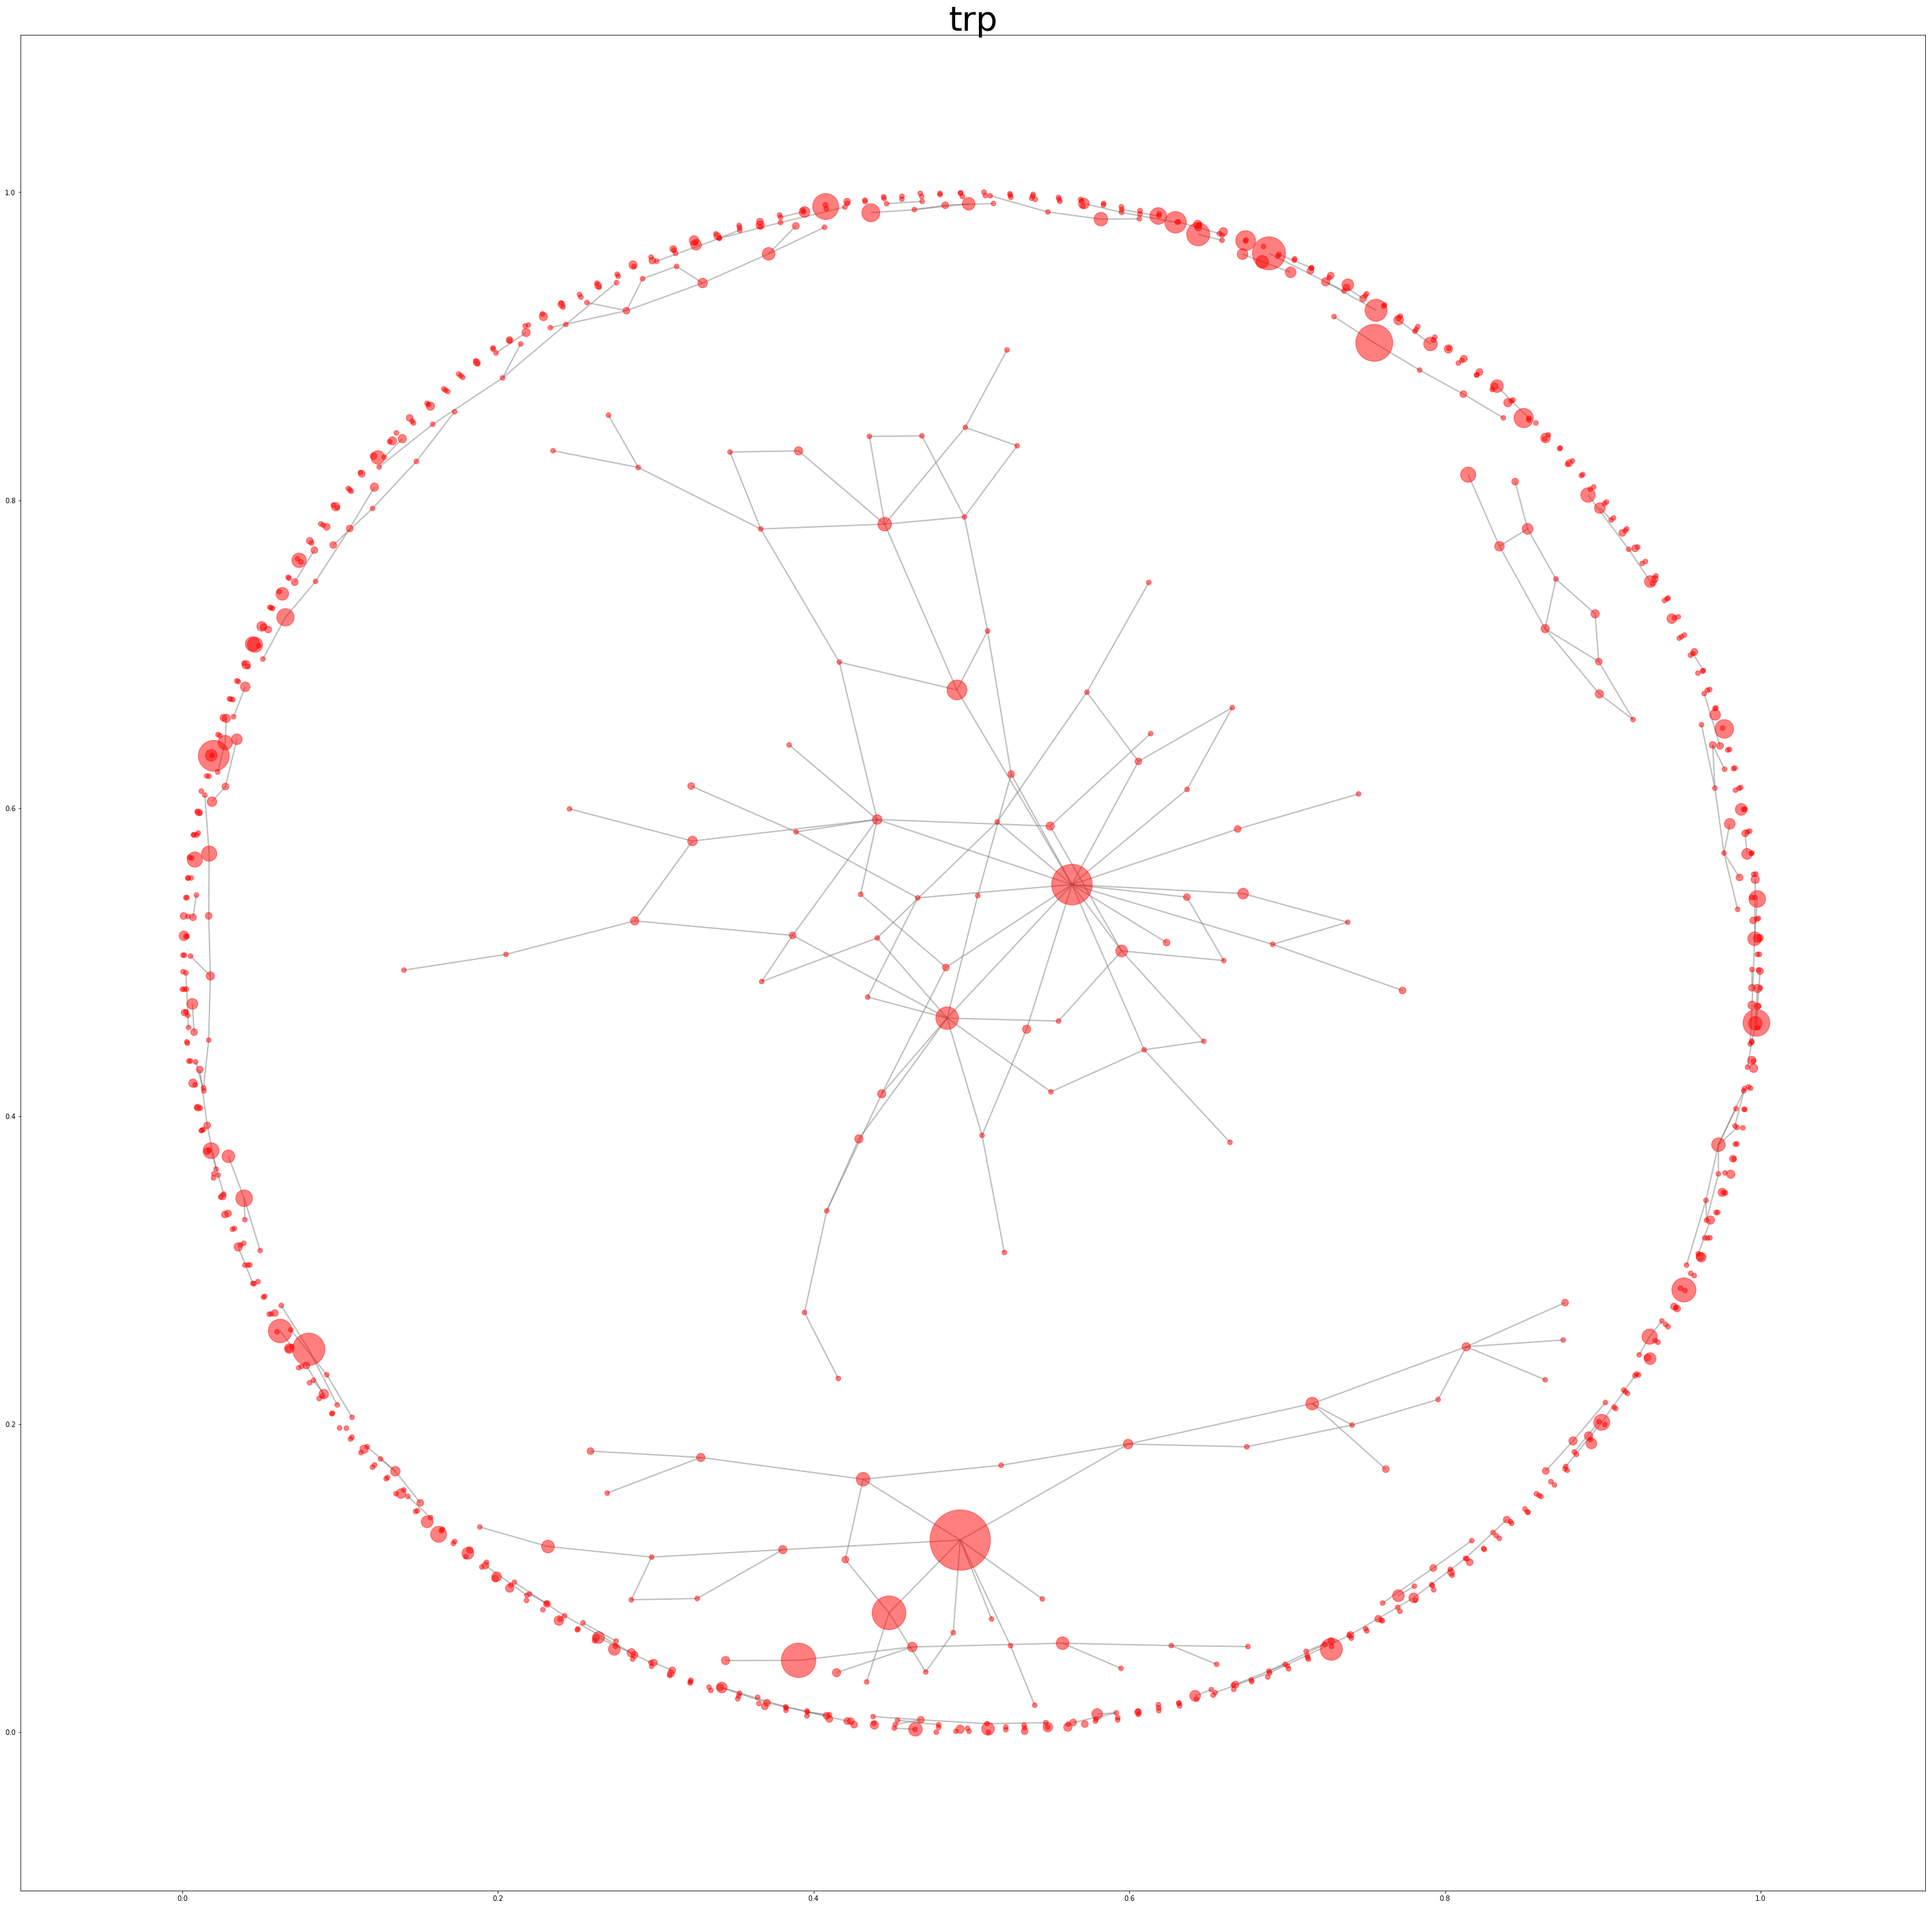

In [20]:
build_graph('trp')

Building the graph
Plotting the graph


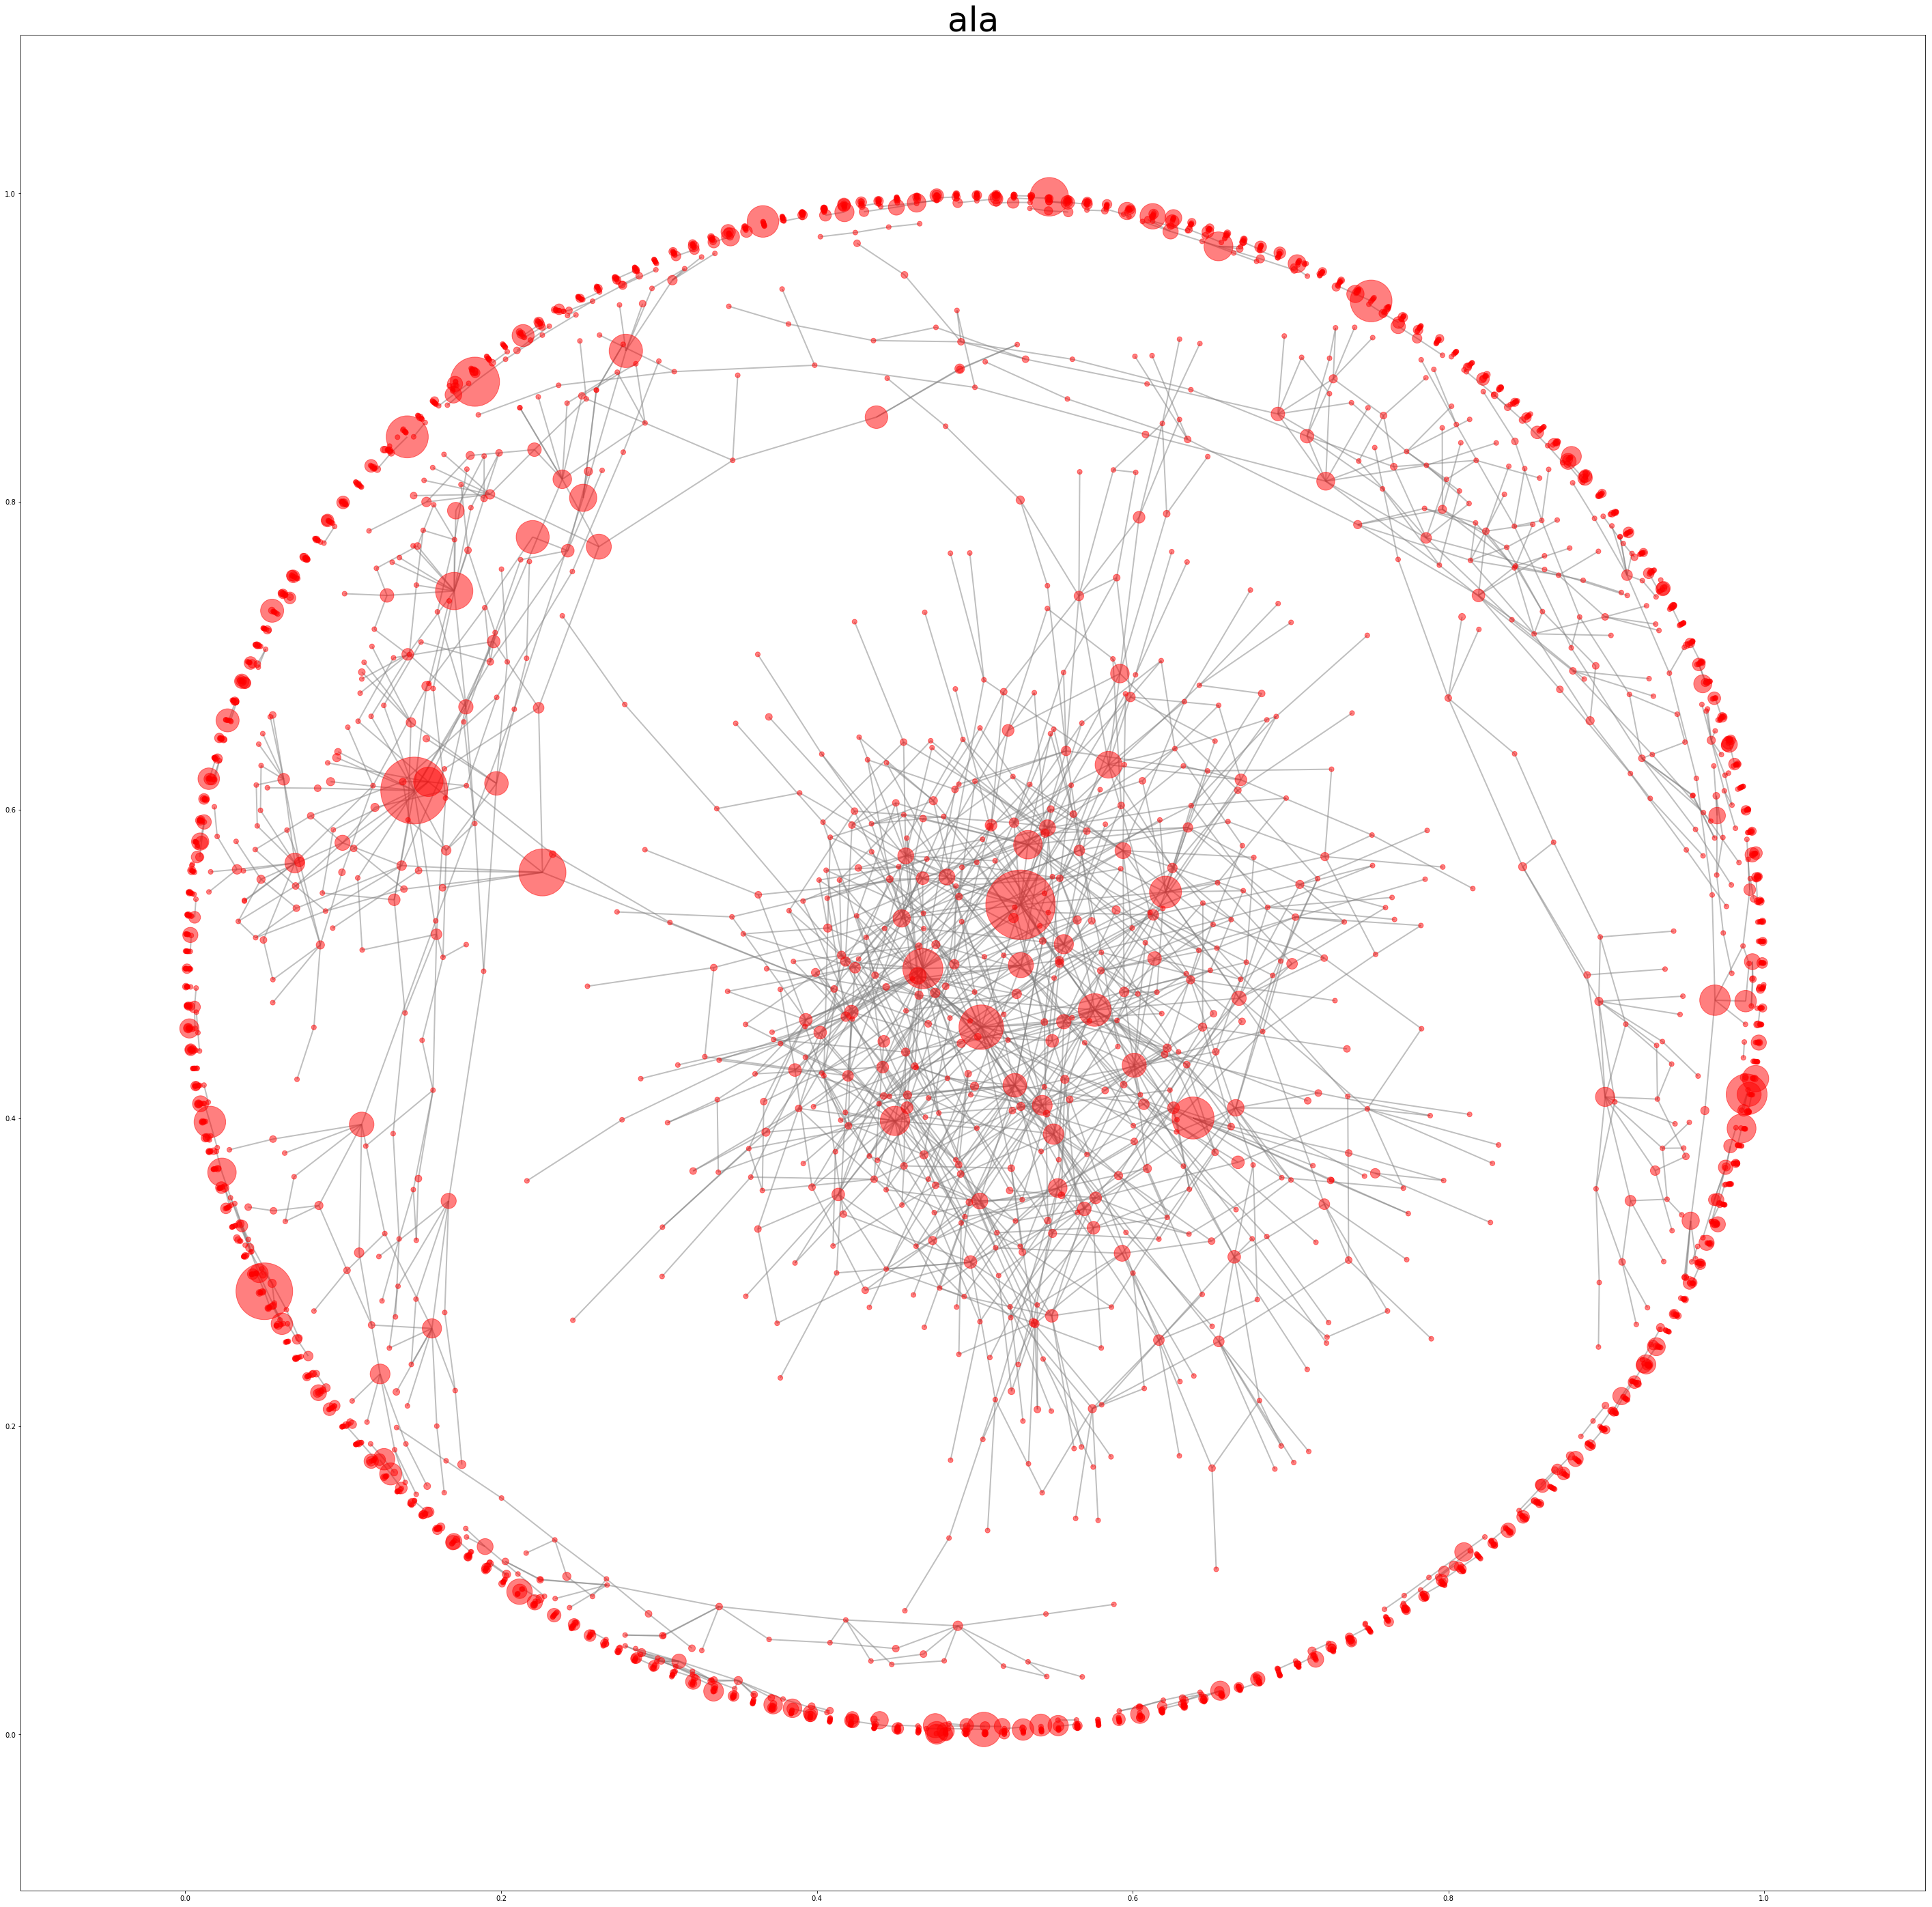

In [21]:
build_graph('ala')